* Look at wind and drifer particle comparison

In [1]:
%matplotlib inline
from matplotlib import pylab,dates
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import datetime as dt
import matplotlib.cm as cm
import pytz, datetime
import glob
import os
import urllib2
import csv
import cStringIO
import requests
from xml.etree import cElementTree as ElementTree
import pandas as pd
import arrow
from IPython.core.display import Image

from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools

from __future__ import division

* Oct8 drop1

In [20]:
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop1/\
ariane_trajectories_qualitative.nc')
lon112=o112.variables['traj_lon']
lat112=o112.variables['traj_lat']

* Oct8 drop2

In [2]:
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212=o212.variables['traj_lon']
lat212=o212.variables['traj_lat']

In [3]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

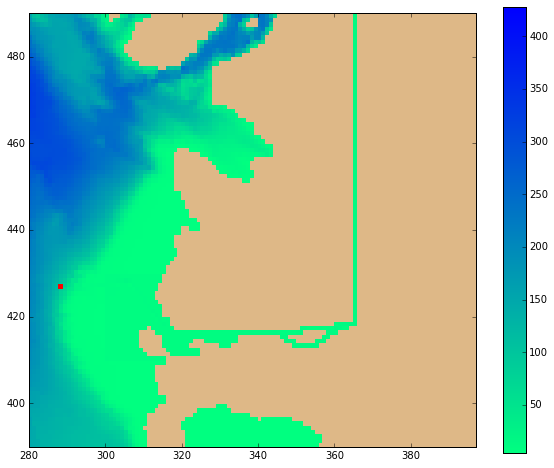

In [4]:
# Bathymetry (Close-Up)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((280, 397, 390, 490))

ax.scatter(288,427,color='red',marker='s')

In [5]:
tracers = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8-10hindcast/SalishSea_1h_20141008_20141010_grid_U.nc')
nc_tools.show_variables(tracers)
v=tracers.variables['vozocrtx']
v.shape

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


(72, 40, 898, 398)

In [6]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8-10hindcast/SalishSea_1h_20141008_20141010_grid_T.nc')
nc_tools.show_variables(tracersT)
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']
nc_tools.timestamp(tracersT, 0)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


<Arrow [2014-10-08T00:30:00+00:00]>

In [7]:
def plotoct(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    ax1.scatter(lon[1:,part],lat[1:,part],color='DodgerBlue',marker='o',label='Model')
    ax1.scatter(lon[0,part],lat[0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend()
    
    ax2.plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    ax3.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax3.plot([tt,tt],[0,10],'b-',label='end')
    ax3.legend(loc='upper left')

    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='upper left')

* Drop 1

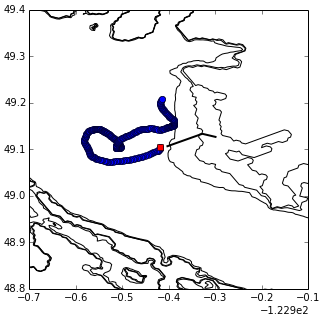

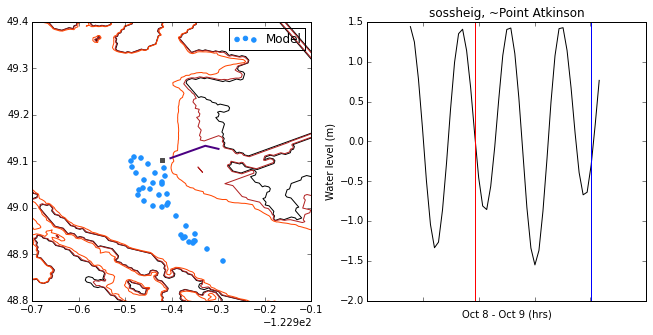

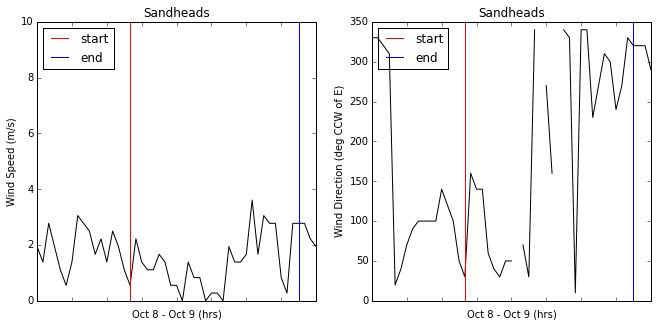

In [21]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

* Drop 2

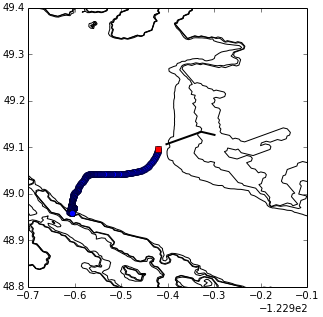

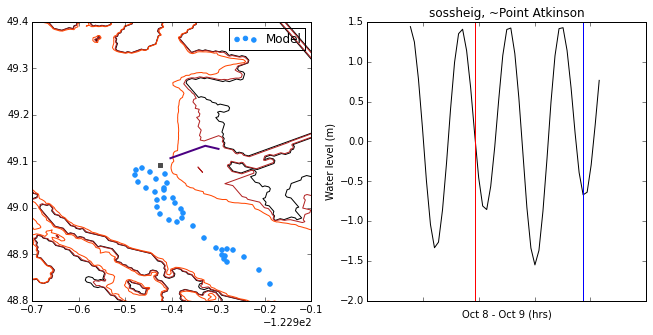

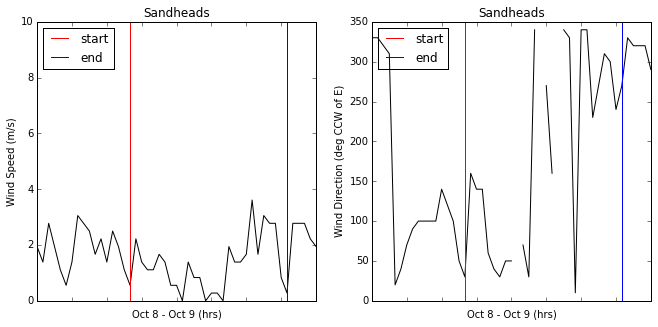

In [8]:
## use results from unsmoothed bathymetry6
plotoct(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

* Compare the observation wind at Sandheads with model wind.

In [9]:
OP = nc.Dataset('/ocean/sallen/allen/research/Meopar/Operational/ops_y2014m10d08.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]
nc_tools.show_variables(OP)

[u'atmpres', u'nav_lat', u'nav_lon', u'precip', u'qair', u'solar', u'tair', u'therm_rad', u'time_counter', u'u_wind', u'v_wind', u'x', u'y']


* EC observations at Sandheads

In [10]:
wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
solar={}; precip={}; qair={}

start = '1-Oct-2014'; end = '9-Oct-2014';
start2 = '9-Oct-2014'; end2 = '9-Oct-2014';

stations = ['Sandheads']

for key in stations:
    [wind_speed[key],wind_dir[key],temp[key],time[key], 
     lat[key], lon[key]] = stormtools.get_EC_observations(key,start,end)
    [ws,wd,T,t, la, lo] = stormtools.get_EC_observations(key,start2,end2)
    wind_speed[key]=np.append(wind_speed[key],ws)
    wind_dir[key]=np.append(wind_dir[key],wd)
    time[key]=np.append(time[key],t)
    temp[key]=np.append(temp[key],T)

In [11]:
def find_model_point(lon,lat,X,Y):
        # Tolerance for searching for grid points
    # (approx. distances between adjacent grid points)
    tol1 = 0.015 # lon
    tol2 = 0.015# lat

    # Search for a grid point with lon/lat within tolerance of
    # measured location
    x1, y1 = np.where(
        np.logical_and(
            (np.logical_and(X > lon-tol1, X < lon+tol1)),
            (np.logical_and(Y > lat-tol2, Y < lat+tol2))))
    return x1[0], y1[0]

* Operation model wind

In [12]:
filesOP = glob.glob('/ocean/sallen/allen/research/Meopar/Operational/ops_y2014m10d0*.nc')
filesOP.sort(key=os.path.basename)

In [13]:
def compile_OP(j,i):
    wind=[]; direc=[]; t=[]; pr=[]; sol=[]; the=[]; pre=[]; tem=[]; qr=[];
    for f in filesOP:
        G = nc.Dataset(f)
        u = G.variables['u_wind'][0:24,j,i]; v=G.variables['v_wind'][0:24,j,i];
        pr.append(G.variables['atmpres'][0:24,j,i]); sol.append(G.variables['solar'][0:24,j,i]); 
        qr.append(G.variables['qair'][0:24,j,i]); the.append(G.variables['therm_rad'][0:24,j,i]); 
        pre.append(G.variables['precip'][0:24,j,i]); tem.append(G.variables['tair'][0:24,j,i])
        speed = np.sqrt(u**2 + v**2)
        wind.append(speed)
        
        d = np.arctan2(v, u)
        d = np.rad2deg(d + (d<0)*2*np.pi);
        direc.append(d)
        
        ts=G.variables['time_counter']
        torig = datetime.datetime(1970,1,1) #there is no time_origin attriubte in OP files, so I hard coded this
        for ind in np.arange(24):
            t.append((torig + datetime.timedelta(seconds=ts[ind])))
    
    wind = np.array(wind).reshape(len(filesOP)*24,)
    direc = np.array(direc,'double').reshape(len(filesOP)*24,)
    t = np.array(t).reshape(len(filesOP)*24,)
    pr= np.array(pr).reshape(len(filesOP)*24,)
    tem = np.array(tem).reshape(len(filesOP)*24,)
    sol = np.array(sol).reshape(len(filesOP)*24,)
    the = np.array(the).reshape(len(filesOP)*24,)
    qr = np.array(qr).reshape(len(filesOP)*24,)
    pre = np.array(pre).reshape(len(filesOP)*24,)
    
    return wind, direc, t, pr, tem, sol, the, qr, pre

In [14]:
stationsOP =['Sandheads_OP']

for (obs, modOP) in zip(stations,stationsOP):    
    [j,i]=find_model_point(lon[obs],lat[obs],OPlon,OPlat)
    lon[modOP] = OPlon[j,i]
    lat[modOP]=OPlat[j,i]

    [wind_speed[modOP],wind_dir[modOP],time[modOP],
     press[modOP],temp[modOP],solar[modOP],
     therm[modOP],qair[modOP],precip[modOP]] = compile_OP(j,i)

* Plot

In [15]:
def compare_winds(duration,key1,key2,sax,eax,day,hour,minute):
    #compare wind speed and direction for data indicated by key1 and key2
    #time limits on axis given by sax,eax, label the duration range of 
    #drifter and particle floats.
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    fig,axs = plt.subplots(2,1,figsize=(20,8))

    for key in [key1,key2]:
        ax=axs[0]
        ax.plot(time[key],wind_speed[key],label=key)
        ax.set_title('Wind speed')
        ax.set_xlim([sax,eax])
        ax.legend(loc=0)
        ax.set_ylabel('wind speed (m/s)')        
    
        ax=axs[1]
        ax.plot(time[key],wind_dir[key],label=key)
        ax.set_title('Wind direction')
        ax.set_xlim([sax,eax])
        ax.legend(loc=0)
        ax.set_ylabel('wind direction (degrees CCW from East)')
    ax=axs[0]
    t =dt.datetime(2014, 10, day, hour, minute)
    ax.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10, day2, hour2, minute)
    ax.plot([tt,tt],[0,10],'y-',label='end')
    
    ax=axs[1]
    t =dt.datetime(2014, 10, day, hour, minute)
    ax.plot([t,t],[0,400],'r-',label='start')
    tt=dt.datetime(2014,10, day2, hour2, minute)
    ax.plot([tt,tt],[0,400],'y-',label='end')
    
    fig,ax = plt.subplots(1,1,figsize=(5,6))
    for key in [key1,key2]:
        ax.plot(lon[key],lat[key],'o',label=key)
        viz_tools.plot_coastline(ax,grid,coords='map')
        ax.legend(loc=0)
        
    return ax

* Sandheads

(49, 50)

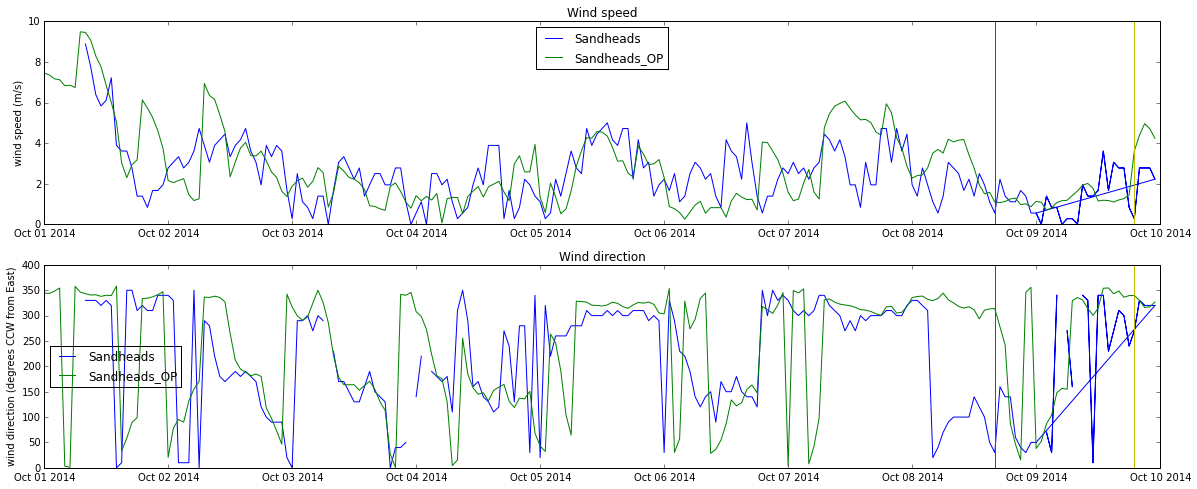

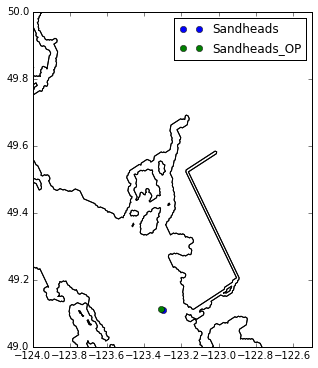

In [17]:
endd = '10-Oct-2014';
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =compare_winds(27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)
ax.set_xlim([-124,-122.5])
ax.set_ylim([49,50])

* Direction of wind between model and observation has much difference from Oct 8-10, in the model, it blows to southeast while in the observations it is northwest in Oct 8 to early hours on Oct 9. I guess this explains part of the discrepency of drifter/particle trajectories.